# CS210 Term Project  

Name Surname: İlhan Sertelli  
Student ID: 30567  
Data Used for the Project: Apple Health Data  


# 1. File Import
Necessary files are imported in this part

In [2]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup


# 2. Creating DataFrames

2.1 - Creating the main dataframe  
2.2 - Handling the NaN values if exists  
2.3 - Constructing sub-dataframes and merging them

In [3]:
with open('AppleHealth.xml', 'r') as file:
    xml_content = file.read()

soup = BeautifulSoup(xml_content, 'xml')

# Extract data from all Record tags
record_data_list = []
for record in soup.find_all('Record'):
    record_data = {
        'type': record.get('type'),
        'unit': record.get('unit'),
        'creationDate': record.get('creationDate'),
        'startDate': record.get('startDate'),
        'endDate': record.get('endDate'),
        'value': record.get('value')
    }
    record_data_list.append(record_data)

# Create a DataFrame
df = pd.DataFrame(record_data_list)

In [4]:
# Defined a function that checks if there are any missing values in the dataframe
def checkMissingValues(templateDf):
    # Check for missing values in each column
    missing_values = templateDf.isnull().sum()

    # Check for missing values in the entire DataFrame
    total_missing = templateDf.isnull().sum().sum()
    if total_missing == 0:
        return True
    else:
        return False

# Here checking the whole dataframe if there are missing values
check = checkMissingValues(df)
if check == False:
    # Remove rows with any missing values
    df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))


In [5]:
stepCount_df20 = df[(df['type'] == 'HKQuantityTypeIdentifierStepCount') & (df['creationDate'].str[0:4] == '2020')]
distCount_df20 = df[(df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning') & (df['creationDate'].str[0:4] == '2020')]

stepCount_df21 = df[(df['type'] == 'HKQuantityTypeIdentifierStepCount') & (df['creationDate'].str[0:4] == '2021')]
distCount_df21 = df[(df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning') & (df['creationDate'].str[0:4] == '2021')]

# Filter the DataFrame by the "type" attribute
stepCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierStepCount') & (df['creationDate'].str[0:4] == '2022')] #Yil Opsiyonel
distCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning') & (df['creationDate'].str[0:4] == '2022')]
basalCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned') & (df['creationDate'].str[0:4] == '2022')]
activeCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned') & (df['creationDate'].str[0:4] == '2022')]
dbCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierHeadphoneAudioExposure') & (df['creationDate'].str[0:4] == '2022')]
speedCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed') & (df['creationDate'].str[0:4] == '2022')]
stepLengthCount_df22 = df[(df['type'] == 'HKQuantityTypeIdentifierWalkingStepLength') & (df['creationDate'].str[0:4] == '2022')]


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 


In [6]:
# Filter the DataFrame by the "type" attribute
stepCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierStepCount') & (df['creationDate'].str[0:4] == '2023')] #Yil Opsiyonel
distCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning') & (df['creationDate'].str[0:4] == '2023')]
basalCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned') & (df['creationDate'].str[0:4] == '2023')]
activeCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned') & (df['creationDate'].str[0:4] == '2023')]
dbCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierHeadphoneAudioExposure') & (df['creationDate'].str[0:4] == '2023')]
speedCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed') & (df['creationDate'].str[0:4] == '2023')]
stepLengthCount_df23 = df[(df['type'] == 'HKQuantityTypeIdentifierWalkingStepLength') & (df['creationDate'].str[0:4] == '2023')]


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 


In [7]:
#2020, 2021, 2022 & 2023 STEP COUNT

"""
2020
"""

creCol = list(stepCount_df20['creationDate'])
valCol = list(stepCount_df20['value'])
totalCount = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = int(valCol[i])
    if date_part not in totalCount:
        totalCount[date_part] = val
    else:
        totalCount[date_part] += val

CumulativeStep = []
for elem in totalCount:
    record_data = {
        'type': 'HKQuantityTypeIdentifierStepCount',
        'unit': 'count',
        'creationDate': elem,
        'value': totalCount[elem]
    }
    CumulativeStep.append(record_data)

totalStepDf20 = pd.DataFrame(CumulativeStep)
#selected_rows = totalStepDf20.sample(n=340, random_state=42)

"""
2021
"""

creCol = list(stepCount_df21['creationDate'])
valCol = list(stepCount_df21['value'])
totalCount = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = int(valCol[i])
    if date_part not in totalCount:
        totalCount[date_part] = val
    else:
        totalCount[date_part] += val

CumulativeStep = []
for elem in totalCount:
    record_data = {
        'type': 'HKQuantityTypeIdentifierStepCount',
        'unit': 'count',
        'creationDate': elem,
        'value': totalCount[elem]
    }
    CumulativeStep.append(record_data)

totalStepDf21 = pd.DataFrame(CumulativeStep)


"""
2022
"""

creCol = list(stepCount_df22['creationDate'])
valCol = list(stepCount_df22['value'])
totalCount = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = int(valCol[i])
    if date_part not in totalCount:
        totalCount[date_part] = val
    else:
        totalCount[date_part] += val

CumulativeStep = []
for elem in totalCount:
    record_data = {
        'type': 'HKQuantityTypeIdentifierStepCount',
        'unit': 'count',
        'creationDate': elem,
        'value': totalCount[elem]
    }
    CumulativeStep.append(record_data)

totalStepDf22 = pd.DataFrame(CumulativeStep)
#totalStepDf22

"""
2023
"""

creCol = list(stepCount_df23['creationDate'])
valCol = list(stepCount_df23['value'])
totalCount = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = int(valCol[i])
    if date_part not in totalCount:
        totalCount[date_part] = val
    else:
        totalCount[date_part] += val

CumulativeStep = []
for elem in totalCount:
    record_data = {
        'type': 'HKQuantityTypeIdentifierStepCount',
        'unit': 'count',
        'creationDate': elem,
        'value': totalCount[elem]
    }
    CumulativeStep.append(record_data)

totalStepDf23 = pd.DataFrame(CumulativeStep)

summary_stats20 = totalStepDf20.describe()
summary_stats21 = totalStepDf21.describe()
summary_stats22 = totalStepDf22.describe()
summary_stats23 = totalStepDf23.describe()

totalStepDf20['creationDate'] = pd.to_datetime(totalStepDf20['creationDate'])
totalStepDf21['creationDate'] = pd.to_datetime(totalStepDf21['creationDate'])
totalStepDf22['creationDate'] = pd.to_datetime(totalStepDf22['creationDate'])
totalStepDf23['creationDate'] = pd.to_datetime(totalStepDf23['creationDate'])

print("Summary of the data in 2020: \n", summary_stats20)
print("\nSummary of the data in 2021: \n", summary_stats21)
print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

#totalStepDf22.head()


Summary of the data in 2020: 
               value
count    366.000000
mean    2713.368852
std     2132.246958
min      553.000000
25%     1578.000000
50%     2055.500000
75%     2930.500000
max    15218.000000

Summary of the data in 2021: 
               value
count    364.000000
mean    4226.189560
std     3293.301251
min      722.000000
25%     1804.750000
50%     2885.000000
75%     5837.000000
max    18463.000000
Summary of the data in 2022: 
               value
count    361.000000
mean    6376.722992
std     3662.417048
min       20.000000
25%     3506.000000
50%     6161.000000
75%     8502.000000
max    21428.000000

Summary of the data in 2023: 
               value
count    341.000000
mean    8039.463343
std     4393.037863
min      971.000000
25%     5224.000000
50%     7449.000000
75%     9796.000000
max    31708.000000


In [8]:
#2020, 2021, 2022 & 2023 DISTANCE TRAVELLED

"""
2020
"""

creCol = list(distCount_df20['creationDate'])
valCol = list(distCount_df20['value'])
totalDist = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDist:
        totalDist[date_part] = val
    else:
        totalDist[date_part] += val

CumulativeDist = []
for elem in totalDist:
    record_data = {
        'type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
        'unit': 'km',
        'creationDate': elem,
        'value': totalDist[elem]
    }
    CumulativeDist.append(record_data)

totalDistDf20 = pd.DataFrame(CumulativeDist)

"""
2021
"""

creCol = list(distCount_df21['creationDate'])
valCol = list(distCount_df21['value'])
totalDist = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDist:
        totalDist[date_part] = val
    else:
        totalDist[date_part] += val

CumulativeDist = []
for elem in totalDist:
    record_data = {
        'type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
        'unit': 'km',
        'creationDate': elem,
        'value': totalDist[elem]
    }
    CumulativeDist.append(record_data)

totalDistDf21 = pd.DataFrame(CumulativeDist)


"""
2022
"""

creCol = list(distCount_df22['creationDate'])
valCol = list(distCount_df22['value'])
totalDist = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDist:
        totalDist[date_part] = val
    else:
        totalDist[date_part] += val

CumulativeDist = []
for elem in totalDist:
    record_data = {
        'type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
        'unit': 'km',
        'creationDate': elem,
        'value': totalDist[elem]
    }
    CumulativeDist.append(record_data)

totalDistDf22 = pd.DataFrame(CumulativeDist)
#totalDistDf22

"""
2023
"""

creCol = list(distCount_df23['creationDate'])
valCol = list(distCount_df23['value'])
totalDist = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDist:
        totalDist[date_part] = val
    else:
        totalDist[date_part] += val

CumulativeDist = []
for elem in totalDist:
    record_data = {
        'type': 'HKQuantityTypeIdentifierDistanceWalkingRunning',
        'unit': 'km',
        'creationDate': elem,
        'value': totalDist[elem]
    }
    CumulativeDist.append(record_data)

totalDistDf23 = pd.DataFrame(CumulativeDist)
#totalDistDf23

summary_stats20 = totalDistDf20.describe()
summary_stats21 = totalDistDf21.describe()
summary_stats22 = totalDistDf22.describe()
summary_stats23 = totalDistDf23.describe()

totalDistDf20['creationDate'] = pd.to_datetime(totalDistDf20['creationDate'])
totalDistDf21['creationDate'] = pd.to_datetime(totalDistDf21['creationDate'])
totalDistDf22['creationDate'] = pd.to_datetime(totalDistDf22['creationDate'])
totalDistDf23['creationDate'] = pd.to_datetime(totalDistDf23['creationDate'])

print("Summary of the data in 2020: \n", summary_stats20)
print("\nSummary of the data in 2021: \n", summary_stats21)
print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2020: 
             value
count  366.000000
mean     1.848675
std      1.435658
min      0.388130
25%      1.079017
50%      1.400095
75%      2.017773
max      9.907574

Summary of the data in 2021: 
             value
count  364.000000
mean     2.956061
std      2.284091
min      0.506700
25%      1.261125
50%      1.989525
75%      4.136470
max     12.283785
Summary of the data in 2022: 
             value
count  361.000000
mean     4.349334
std      2.510253
min      0.014980
25%      2.401310
50%      4.170150
75%      5.788290
max     14.175275

Summary of the data in 2023: 
             value
count  341.000000
mean     5.624646
std      3.155931
min      0.664510
25%      3.512790
50%      5.184479
75%      7.126484
max     24.879886


In [9]:
#2022 & 2023 BASAL ENERGY BURNT
"""
2022
"""

creCol = list(basalCount_df22['creationDate'])
valCol = list(basalCount_df22['value'])
totalBasal = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalBasal:
        totalBasal[date_part] = val
    else:
        totalBasal[date_part] += val

CumulativeBasal = []
for elem in totalBasal:
    record_data = {
        'type': 'HKQuantityTypeIdentifierBasalEnergyBurned',
        'unit': 'kcal',
        'creationDate': elem,
        'value': totalBasal[elem]
    }
    CumulativeBasal.append(record_data)

totalBasalDf22 = pd.DataFrame(CumulativeBasal)
#totalBasalDf22

"""
2023
"""

creCol = list(basalCount_df23['creationDate'])
valCol = list(basalCount_df23['value'])
totalBasal = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalBasal:
        totalBasal[date_part] = val
    else:
        totalBasal[date_part] += val

CumulativeBasal = []
for elem in totalBasal:
    record_data = {
        'type': 'HKQuantityTypeIdentifierBasalEnergyBurned',
        'unit': 'kcal',
        'creationDate': elem,
        'value': totalBasal[elem]
    }
    CumulativeBasal.append(record_data)

totalBasalDf23 = pd.DataFrame(CumulativeBasal)
#totalBasalDf23

summary_stats22 = totalBasalDf22.describe()
summary_stats23 = totalBasalDf23.describe()

totalBasalDf22['creationDate'] = pd.to_datetime(totalBasalDf22['creationDate'])
totalBasalDf23['creationDate'] = pd.to_datetime(totalBasalDf23['creationDate'])

print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2022: 
              value
count    12.000000
mean   1720.700667
std     398.175069
min     484.444000
25%    1787.034750
50%    1827.056500
75%    1867.566250
max    1994.018000

Summary of the data in 2023: 
              value
count   341.000000
mean   1823.847372
std      75.256590
min    1358.409000
25%    1792.102000
50%    1821.948000
75%    1858.751000
max    2306.417000


In [10]:
#2022 & 2023 ACTIVE ENERGY BURNT
"""
2022
"""

creCol = list(activeCount_df22['creationDate'])
valCol = list(activeCount_df22['value'])
totalActive = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalActive:
        totalActive[date_part] = val
    else:
        totalActive[date_part] += val

CumulativeActive = []
for elem in totalActive:
    record_data = {
        'type': 'HKQuantityTypeIdentifierActiveEnergyBurned',
        'unit': 'kcal',
        'creationDate': elem,
        'value': totalActive[elem]
    }
    CumulativeActive.append(record_data)

totalActiveDf22 = pd.DataFrame(CumulativeActive)
#totalActiveDf22

"""
2023
"""

creCol = list(activeCount_df23['creationDate'])
valCol = list(activeCount_df23['value'])
totalActive = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalActive:
        totalActive[date_part] = val
    else:
        totalActive[date_part] += val

CumulativeActive = []
for elem in totalActive:
    record_data = {
        'type': 'HKQuantityTypeIdentifierActiveEnergyBurned',
        'unit': 'kcal',
        'creationDate': elem,
        'value': totalActive[elem]
    }
    CumulativeActive.append(record_data)

totalActiveDf23 = pd.DataFrame(CumulativeActive)
#totalActiveDf23

summary_stats22 = totalActiveDf22.describe()
summary_stats23 = totalActiveDf23.describe()

totalActiveDf22['creationDate'] = pd.to_datetime(totalActiveDf22['creationDate'])
totalActiveDf23['creationDate'] = pd.to_datetime(totalActiveDf23['creationDate'])

print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2022: 
             value
count   12.000000
mean   342.633333
std    146.399795
min    151.701000
25%    228.728250
50%    330.421000
75%    465.830250
max    557.633000

Summary of the data in 2023: 
              value
count   341.000000
mean    284.749674
std     162.021993
min      31.963000
25%     171.471000
50%     265.616000
75%     383.737000
max    1191.785000


In [11]:
#2022 & 2023 AVERAGE LOUDNESS
"""
2022
"""
creCol = list(dbCount_df22['creationDate'])
valCol = list(dbCount_df22['value'])
totalDb = {}
countDb = {}
AvgDb = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDb:
        totalDb[date_part] = val
        countDb[date_part] = 1
    else:
        totalDb[date_part] += val
        countDb[date_part] += 1

for j in totalDb:
    AvgDb[j] = totalDb[j] / countDb[j]
    
CumulativeDb = []
for elem in totalDb:
    record_data = {
        'type': 'HKQuantityTypeIdentifierHeadphoneAudioExposure',
        'unit': 'db',
        'creationDate': elem,
        'value': AvgDb[elem]
    }
    CumulativeDb.append(record_data)

AvgDbDf22 = pd.DataFrame(CumulativeDb)
#AvgDbDf22

#2022 & 2023 AVERAGE LOUDNESS
"""
2022
"""
creCol = list(dbCount_df23['creationDate'])
valCol = list(dbCount_df23['value'])
totalDb = {}
countDb = {}
AvgDb = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalDb:
        totalDb[date_part] = val
        countDb[date_part] = 1
    else:
        totalDb[date_part] += val
        countDb[date_part] += 1

for j in totalDb:
    AvgDb[j] = totalDb[j] / countDb[j]
    
CumulativeDb = []
for elem in totalDb:
    record_data = {
        'type': 'HKQuantityTypeIdentifierHeadphoneAudioExposure',
        'unit': 'db',
        'creationDate': elem,
        'value': AvgDb[elem]
    }
    CumulativeDb.append(record_data)

AvgDbDf23 = pd.DataFrame(CumulativeDb)
#AvgDbDf23

summary_stats22 = AvgDbDf22.describe()
summary_stats23 = AvgDbDf23.describe()

AvgDbDf22['creationDate'] = pd.to_datetime(AvgDbDf22['creationDate'])
AvgDbDf23['creationDate'] = pd.to_datetime(AvgDbDf23['creationDate'])

print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2022: 
             value
count  365.000000
mean    54.428882
std      4.512500
min     42.727033
25%     51.634890
50%     54.099310
75%     57.041373
max     77.286986

Summary of the data in 2023: 
             value
count  335.000000
mean    54.626321
std      5.391074
min     41.868500
25%     50.766782
50%     54.059501
75%     57.688097
max     71.727450


In [12]:
#2022 & 2023 AVERAGE WALKING SPEED
"""
2022
"""
creCol = list(speedCount_df22['creationDate'])
valCol = list(speedCount_df22['value'])
totalSpeed = {}
countSpeed = {}
AvgSpeed = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalSpeed:
        totalSpeed[date_part] = val
        countSpeed[date_part] = 1
    else:
        totalSpeed[date_part] += val
        countSpeed[date_part] += 1

for j in totalSpeed:
    AvgSpeed[j] = totalSpeed[j] / countSpeed[j]
    
CumulativeSpeed = []
for elem in totalSpeed:
    record_data = {
        'type': 'HKQuantityTypeIdentifierWalkingSpeed',
        'unit': 'km/hr',
        'creationDate': elem,
        'value': AvgSpeed[elem]
    }
    CumulativeSpeed.append(record_data)

AvgSpeedDf22 = pd.DataFrame(CumulativeSpeed)
#AvgSpeedDf22

"""
2023
"""

creCol = list(speedCount_df23['creationDate'])
valCol = list(speedCount_df23['value'])
totalSpeed = {}
countSpeed = {}
AvgSpeed = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalSpeed:
        totalSpeed[date_part] = val
        countSpeed[date_part] = 1
    else:
        totalSpeed[date_part] += val
        countSpeed[date_part] += 1

for j in totalSpeed:
    AvgSpeed[j] = totalSpeed[j] / countSpeed[j]
    
CumulativeSpeed = []
for elem in totalSpeed:
    record_data = {
        'type': 'HKQuantityTypeIdentifierWalkingSpeed',
        'unit': 'km/hr',
        'creationDate': elem,
        'value': AvgSpeed[elem]
    }
    CumulativeSpeed.append(record_data)

AvgSpeedDf23 = pd.DataFrame(CumulativeSpeed)
#AvgSpeedDf23

summary_stats22 = AvgSpeedDf22.describe()
summary_stats23 = AvgSpeedDf23.describe()

AvgSpeedDf22['creationDate'] = pd.to_datetime(AvgSpeedDf22['creationDate'])
AvgSpeedDf23['creationDate'] = pd.to_datetime(AvgSpeedDf23['creationDate'])

print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2022: 
            value
count  12.000000
mean    4.589459
std     0.273191
min     3.989000
25%     4.458133
50%     4.573482
75%     4.778043
max     4.961143

Summary of the data in 2023: 
             value
count  333.000000
mean     4.442724
std      0.347255
min      3.199500
25%      4.236750
50%      4.500000
75%      4.664115
max      5.294880


In [13]:
#2022 & 2023 AVERAGE WALKING STEP LENGTH
"""
2022
"""

creCol = list(stepLengthCount_df22['creationDate'])
valCol = list(stepLengthCount_df22['value'])
totalLen = {}
countLen = {}
AvgLen = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalLen:
        totalLen[date_part] = val
        countLen[date_part] = 1
    else:
        totalLen[date_part] += val
        countLen[date_part] += 1

for j in totalLen:
    AvgLen[j] = totalLen[j] / countLen[j]
    
CumulativeLen = []
for elem in totalLen:
    record_data = {
        'type': 'HKQuantityTypeIdentifierWalkingStepLength',
        'unit': 'cm',
        'creationDate': elem,
        'value': AvgLen[elem]
    }
    CumulativeLen.append(record_data)

AvgLenDf22 = pd.DataFrame(CumulativeLen)
#AvgLenDf22

"""
2022
"""

creCol = list(stepLengthCount_df23['creationDate'])
valCol = list(stepLengthCount_df23['value'])
totalLen = {}
countLen = {}
AvgLen = {}

for i in range(len(creCol)):
    date_part = creCol[i][0:10]
    val = float(valCol[i])
    if date_part not in totalLen:
        totalLen[date_part] = val
        countLen[date_part] = 1
    else:
        totalLen[date_part] += val
        countLen[date_part] += 1

for j in totalLen:
    AvgLen[j] = totalLen[j] / countLen[j]
    
CumulativeLen = []
for elem in totalLen:
    record_data = {
        'type': 'HKQuantityTypeIdentifierWalkingStepLength',
        'unit': 'cm',
        'creationDate': elem,
        'value': AvgLen[elem]
    }
    CumulativeLen.append(record_data)

AvgLenDf23 = pd.DataFrame(CumulativeLen)
#AvgLenDf23

summary_stats22 = AvgLenDf22.describe()
summary_stats23 = AvgLenDf23.describe()

AvgLenDf22['creationDate'] = pd.to_datetime(AvgLenDf22['creationDate'])
AvgLenDf23['creationDate'] = pd.to_datetime(AvgLenDf23['creationDate'])

print("Summary of the data in 2022: \n", summary_stats22)
print("\nSummary of the data in 2023: \n", summary_stats23)

Summary of the data in 2022: 
            value
count  12.000000
mean   68.253204
std     2.742756
min    62.250000
25%    66.788288
50%    68.273257
75%    69.891304
max    72.126984

Summary of the data in 2023: 
             value
count  333.000000
mean    68.219772
std      3.682516
min     51.375000
25%     66.659574
50%     68.600000
75%     70.555556
max     76.750000


In [14]:
dfs = [totalStepDf23, totalDistDf23, totalBasalDf23, totalActiveDf23, AvgDbDf23, AvgLenDf23, AvgSpeedDf23]
count = 1
for x in dfs:
    dfs[count - 1] = dfs[count - 1].rename(columns={'value': 'value' + str(count)})
    count += 1

healthDf = pd.concat([df.set_index('creationDate') for df in dfs], axis=1)

# Reset index to make 'creationDate' a column again
healthDf = healthDf.reset_index()
# Drop the 'type' columns
healthDf = healthDf.rename(columns={'value1': 'Step Count', 'value2': 'Distance Walked', 'value3': 'Basal Energy Burnt', 'value4': 'Active Energy Burnt',
                                     'value5': 'Average Loudness', 'value6': 'Average Step Length', 'value7': 'Average Walking Speed'})

healthDf = healthDf.drop(columns=['type'])
healthDf.head()


,creationDate,unit,Step Count,unit,Distance Walked,unit,Basal Energy Burnt,unit,Active Energy Burnt,unit,Average Loudness,unit,Average Step Length,unit,Average Walking Speed
0,2023-01-01,count,9186,km,5.772930,kcal,1854.989,kcal,260.084,db,54.461460,cm,65.062500,km/hr,4.313250
1,2023-01-02,count,8448,km,6.123411,kcal,1759.119,kcal,328.035,db,59.117510,cm,69.795455,km/hr,4.758545
2,2023-01-03,count,10294,km,7.600093,kcal,1898.778,kcal,409.668,db,60.622271,cm,70.927536,km/hr,4.891304
3,2023-01-04,count,4908,km,3.372441,kcal,1762.170,kcal,178.509,db,50.637400,cm,68.333333,km/hr,4.750500
4,2023-01-05,count,8781,km,6.271012,kcal,1823.188,kcal,351.409,db,51.421989,cm,70.135135,km/hr,4.838595


# 3. Hypothesis Testing & EDA

Hypothesis: The transition from high school to the university had a significant impact on my personal health activities  

3.1 Divided the data into two groups: One for the time spent on campus and another for the time spent off-campus. While doing that, summer break is regarded as off-campus and the rest of it is regarded as in-campus  

3.2 Computed descriptive statistics for each group separately  

3.3 Visualized the data by using Matplotlib and seaborn in different types of graphs

In [15]:
from scipy.stats import ttest_ind

# Example for 'Step Count' variable
t_stat, p_value = ttest_ind(totalDistDf20['value'], healthDf['Distance Walked'])
print(f'T-test for Step Count: t-statistic = {t_stat}, p-value = {p_value}')


T-test for Step Count: t-statistic = -20.706214823344116, p-value = 9.068183860408197e-75


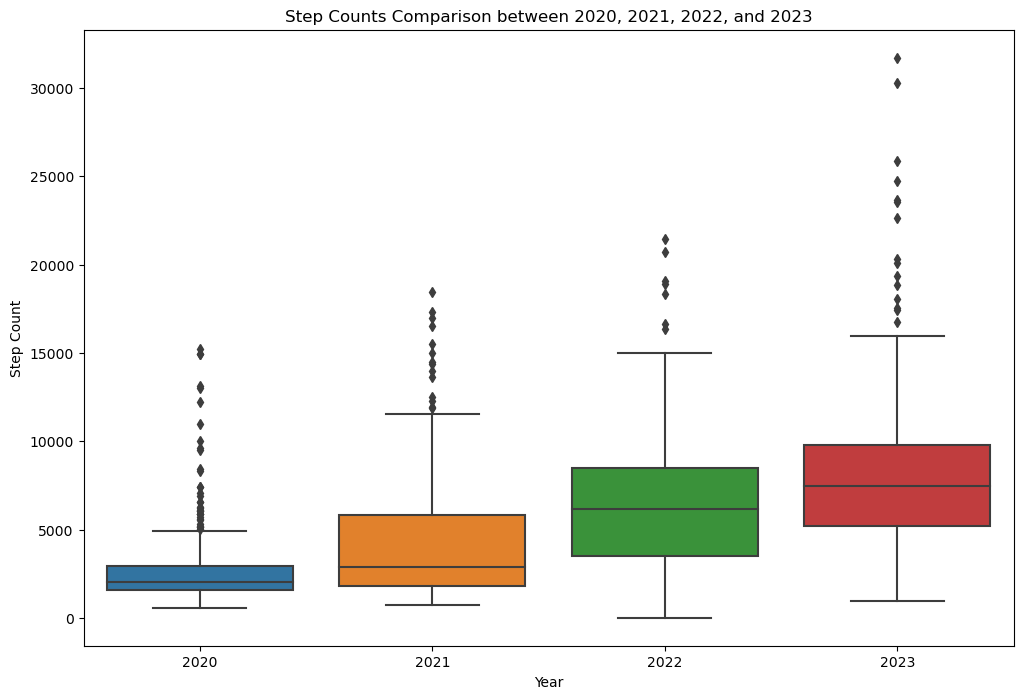

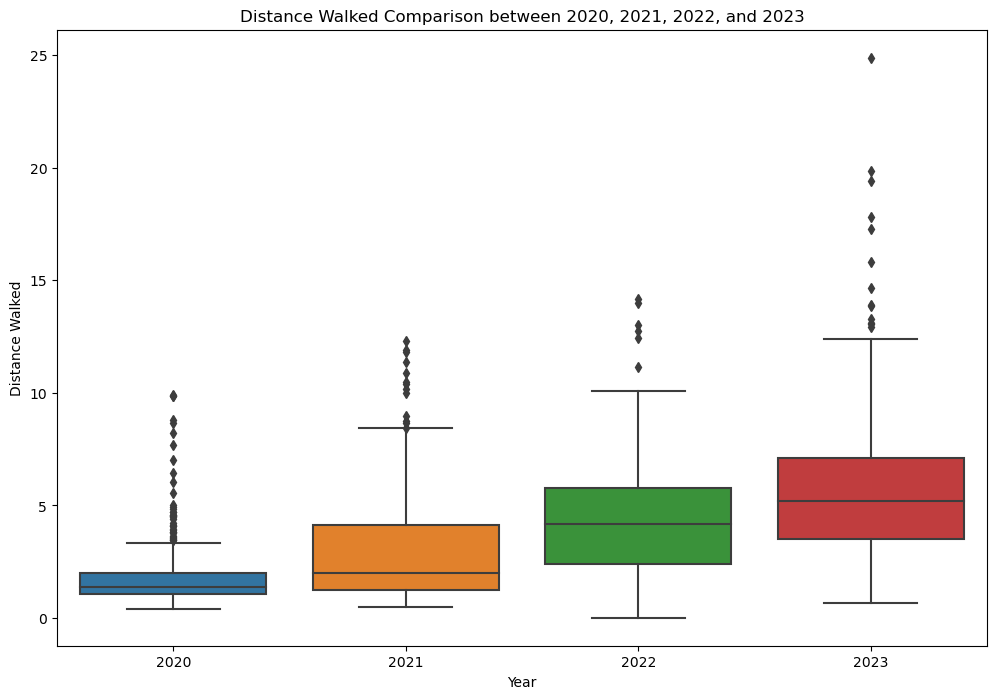

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract relevant columns for each year
step_count_2020 = totalStepDf20['value']
step_count_2021 = totalStepDf21['value']
step_count_2022 = totalStepDf22['value']
step_count_2023 = healthDf['Step Count']

# Create a DataFrame for plotting
plot_data_step_count = pd.DataFrame({'Year': ['2020'] * len(step_count_2020) + ['2021'] * len(step_count_2021) +
                                            ['2022'] * len(step_count_2022) + ['2023'] * len(step_count_2023),
                                     'Step Count': pd.concat([step_count_2020, step_count_2021, step_count_2022, step_count_2023])})

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Step Count', data=plot_data_step_count)
plt.title('Step Counts Comparison between 2020, 2021, 2022, and 2023')
plt.xlabel('Year')
plt.ylabel('Step Count')
plt.show()

# Extract relevant columns for each year
distance_2020 = totalDistDf20['value']
distance_2021 = totalDistDf21['value']
distance_2022 = totalDistDf22['value']
distance_2023 = healthDf['Distance Walked']

# Create a DataFrame for plotting
plot_data_distance_walked = pd.DataFrame({'Year': ['2020'] * len(distance_2020) + ['2021'] * len(distance_2021) +
                                                  ['2022'] * len(distance_2022) + ['2023'] * len(distance_2023),
                                           'Distance Walked': pd.concat([distance_2020, distance_2021, distance_2022, distance_2023])})

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Distance Walked', data=plot_data_distance_walked)
plt.title('Distance Walked Comparison between 2020, 2021, 2022, and 2023')
plt.xlabel('Year')
plt.ylabel('Distance Walked')
plt.show()


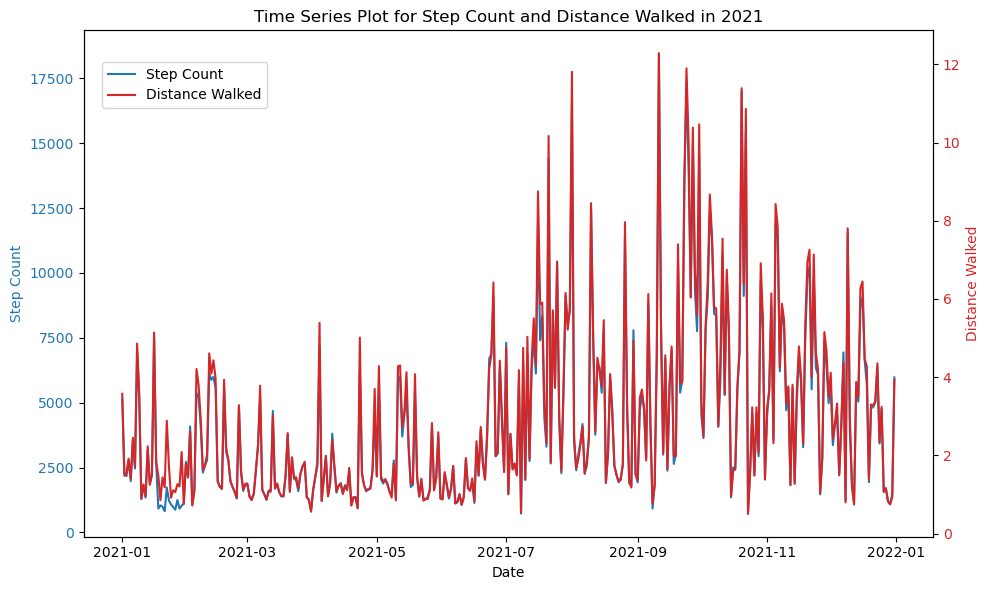

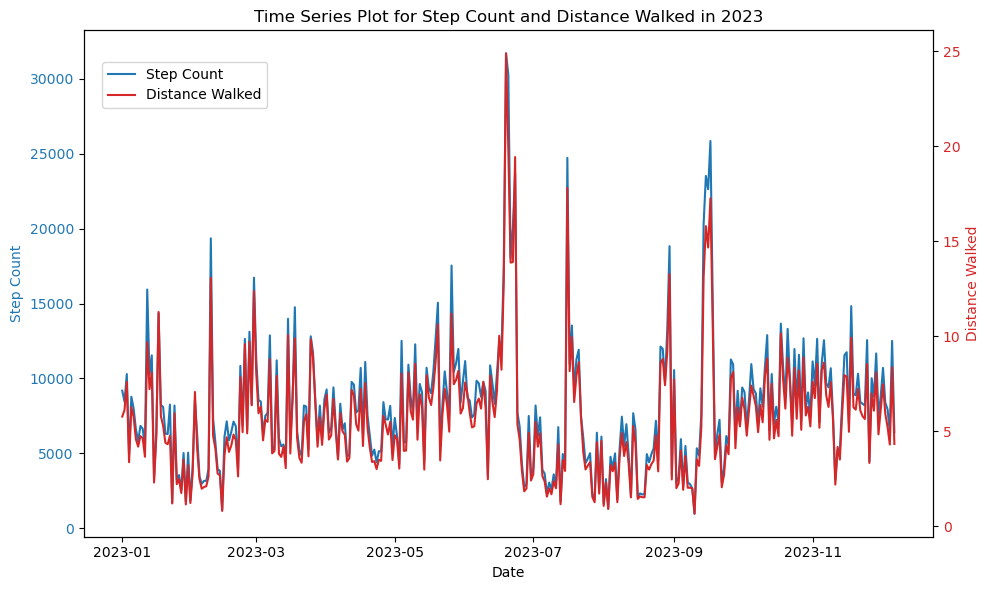

In [17]:
# Create a time series plot for Step Count 2021
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Step Count', color=color)
ax1.plot(totalStepDf21['creationDate'], totalStepDf21['value'], color=color, label='Step Count', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Add a secondary y-axis for Distance Walked 2021
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Distance Walked', color=color)  
ax2.plot(totalDistDf21['creationDate'], totalDistDf21['value'], color=color, label='Distance Walked', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Time Series Plot for Step Count and Distance Walked in 2021')
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


# Create a time series plot for Step Count 2023
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Step Count', color=color)
ax1.plot(healthDf['creationDate'], healthDf['Step Count'], color=color, label='Step Count', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Add a secondary y-axis for Distance Walked 2023
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Distance Walked', color=color)  
ax2.plot(healthDf['creationDate'], healthDf['Distance Walked'], color=color, label='Distance Walked', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Time Series Plot for Step Count and Distance Walked in 2023')
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()


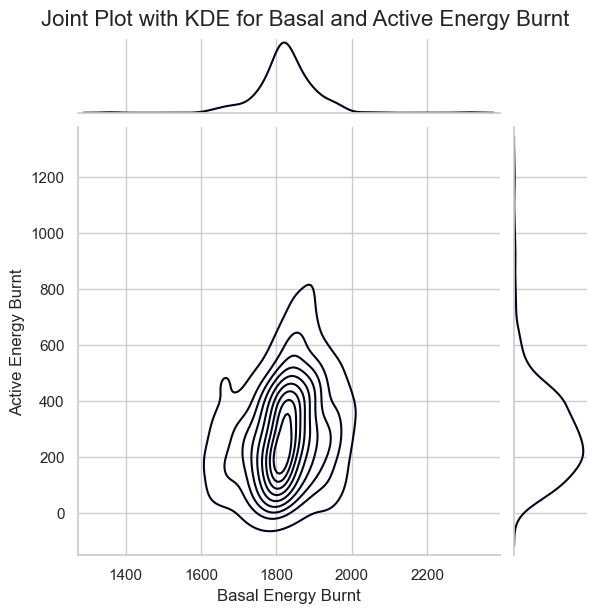

In [18]:
sns.set_theme(style="whitegrid")

# Create a joint plot with KDE and marginal histograms
g = sns.jointplot(data=healthDf, x="Basal Energy Burnt", y="Active Energy Burnt", kind="kde", color="#03051A")

# Customize the plot
g.set_axis_labels("Basal Energy Burnt", "Active Energy Burnt", fontsize=12)
plt.suptitle('Joint Plot with KDE for Basal and Active Energy Burnt', y=1.02, fontsize=16)

# Show the plot
plt.show()


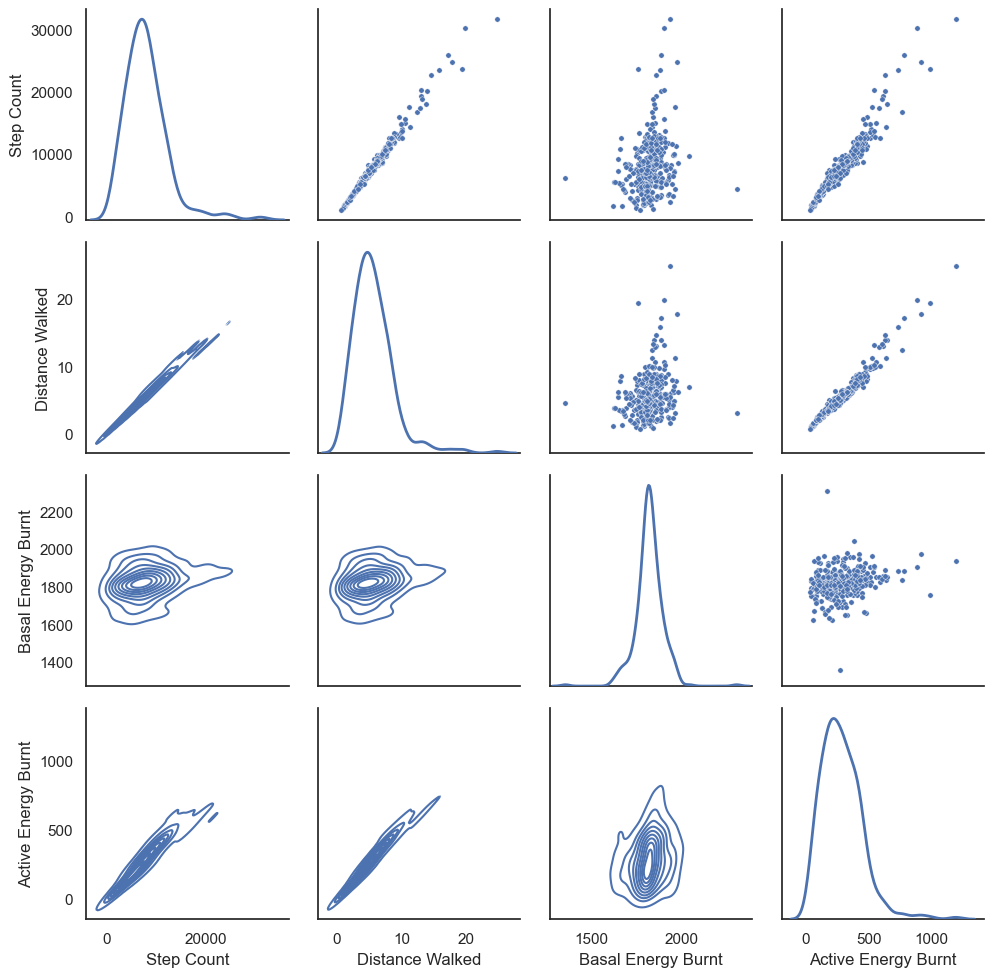

In [19]:
import seaborn as sns
sns.set_theme(style="white")

features_to_keep = ["Step Count", "Distance Walked", "Basal Energy Burnt", "Active Energy Burnt"]
minimized_df = healthDf[features_to_keep]

g = sns.PairGrid(minimized_df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)


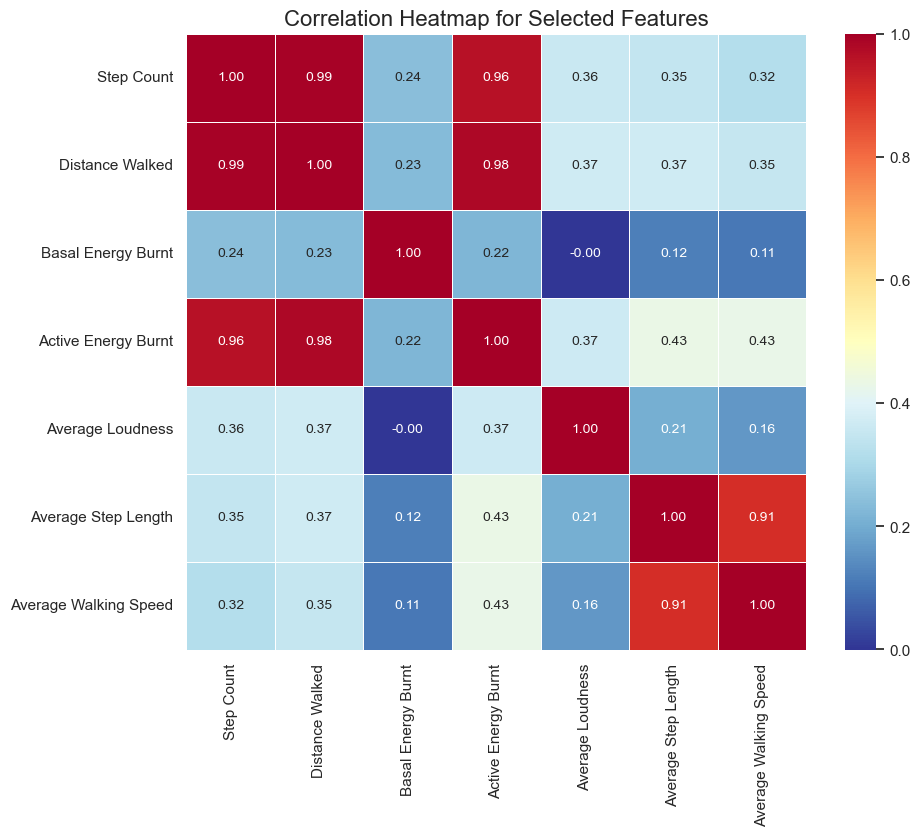

In [20]:

selected_features = ["Step Count", "Distance Walked", "Basal Energy Burnt", "Active Energy Burnt", 
                     "Average Loudness", "Average Step Length", "Average Walking Speed"]

# Create a correlation matrix for the selected features
correlation_matrix = healthDf[selected_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Use the default "RdYlBu_r" color map and adjust other parameters
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu_r", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Customize the plot
plt.title("Correlation Heatmap for Selected Features", fontsize=16)
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability

# Show the plot
plt.show()


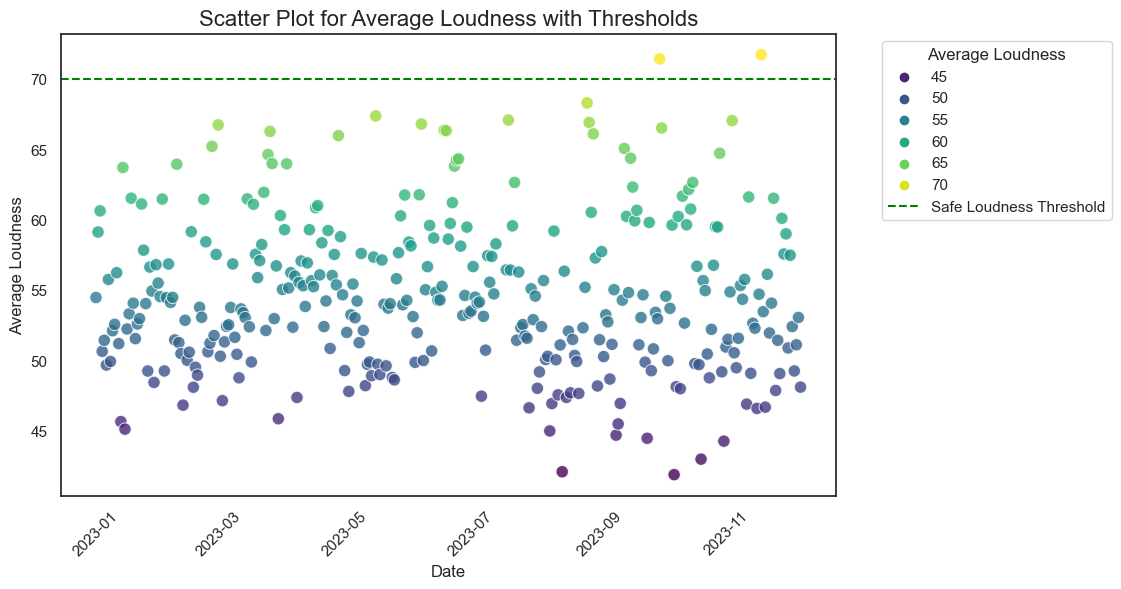

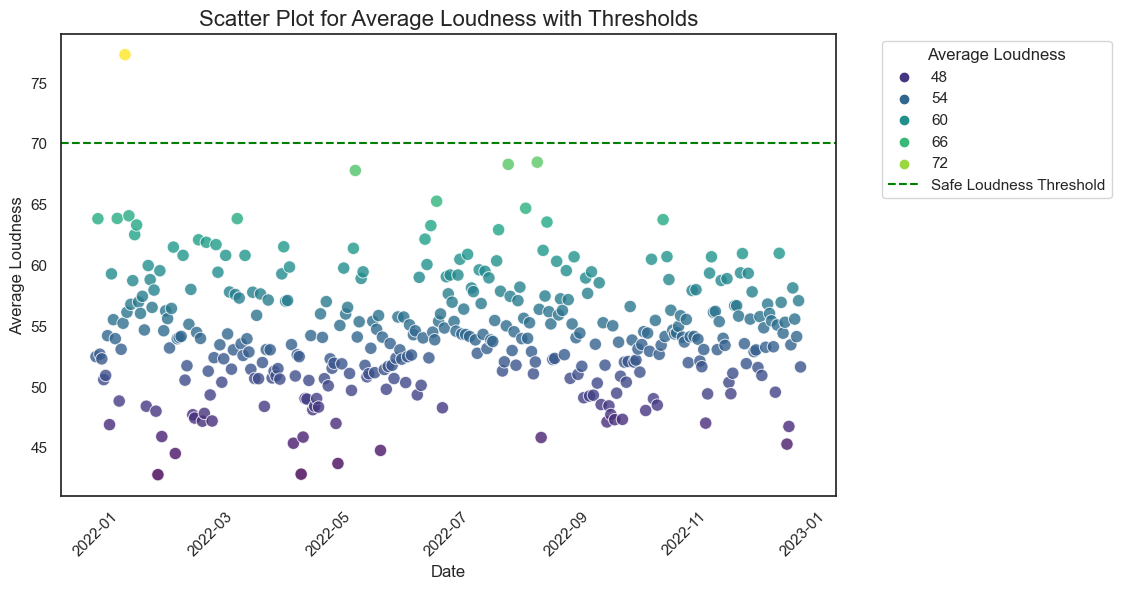

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Average Loudness with a legend
plt.figure(figsize=(10, 6))

# Use scatterplot with hue for the legend
sns.scatterplot(x='creationDate', y='Average Loudness', data=healthDf, hue='Average Loudness', palette='viridis', s=80, alpha=0.8)

# Add horizontal lines for threshold levels
plt.axhline(y=70, color='green', linestyle='--', label='Safe Loudness Threshold')

# Customize the plot
plt.title('Scatter Plot for Average Loudness with Thresholds', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Loudness', fontsize=12)
plt.legend(title='Average Loudness', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Scatter plot for Average Loudness with a legend
plt.figure(figsize=(10, 6))

# Use scatterplot with hue for the legend
sns.scatterplot(x='creationDate', y='value', data=AvgDbDf22, hue='value', palette='viridis', s=80, alpha=0.8)

# Add horizontal lines for threshold levels
plt.axhline(y=70, color='green', linestyle='--', label='Safe Loudness Threshold')

# Customize the plot
plt.title('Scatter Plot for Average Loudness with Thresholds', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Loudness', fontsize=12)
plt.legend(title='Average Loudness', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()




# 4. Machine Learning  
4.1 Applying linear regression  
4.2 Splitting the data  
4.3 Making Prediction on the distance data  
4.4 Making comparions and measuring the errors


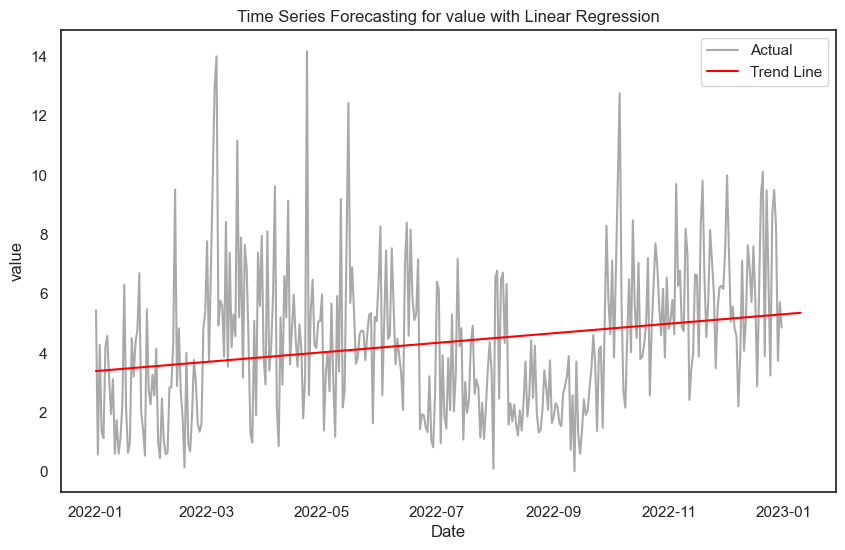

In [22]:
feature_of_interest = 'value'

# Prepare the data
X = totalDistDf22[['creationDate']]
y = totalDistDf22[feature_of_interest]

# Convert datetime values to numeric representation
X_numeric = (X['creationDate'] - X['creationDate'].min()).dt.days.values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_numeric, y)

# Predictions for the entire date range
all_dates = pd.date_range(start=X['creationDate'].min(), end=X['creationDate'].max() + pd.DateOffset(days=10))
all_dates_numeric = (all_dates - X['creationDate'].min()).days.values.reshape(-1, 1)
all_predictions = model.predict(all_dates_numeric)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(totalDistDf22['creationDate'], totalDistDf22[feature_of_interest], label='Actual', color='darkgrey')
plt.plot(all_dates, all_predictions, color='red', label='Trend Line')
plt.title(f'Time Series Forecasting for {feature_of_interest} with Linear Regression')
plt.xlabel('Date')
plt.ylabel(feature_of_interest)
plt.legend()
plt.show()


In [27]:
# Sort the data by timestamp
healthDf_NaN = checkMissingValues(healthDf)
if healthDf_NaN == False:
    healthDf = healthDf.apply(lambda x: x.fillna(x.mode().iloc[0]))
    

healthDf['creationDate'] = healthDf['creationDate'].rank()
health_data = healthDf.sort_values(by='creationDate')

# Set a percentage for the training data
train_percentage = 0.8

# Calculate the split index
split_index = int(len(health_data) * train_percentage)

# Split the data into training and testing sets
train_data = health_data.iloc[:split_index]
test_data = health_data.iloc[split_index:]

# Check the split
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

# Assuming df is your DataFrame
numeric_columns = healthDf.select_dtypes(include=['number', 'datetime'])

X = numeric_columns.drop("Distance Walked", axis=1)  # Features (all columns except the target)
y = numeric_columns["Distance Walked"]


Training Data Shape: (272, 15)
Testing Data Shape: (69, 15)


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [25]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.08485120859432689


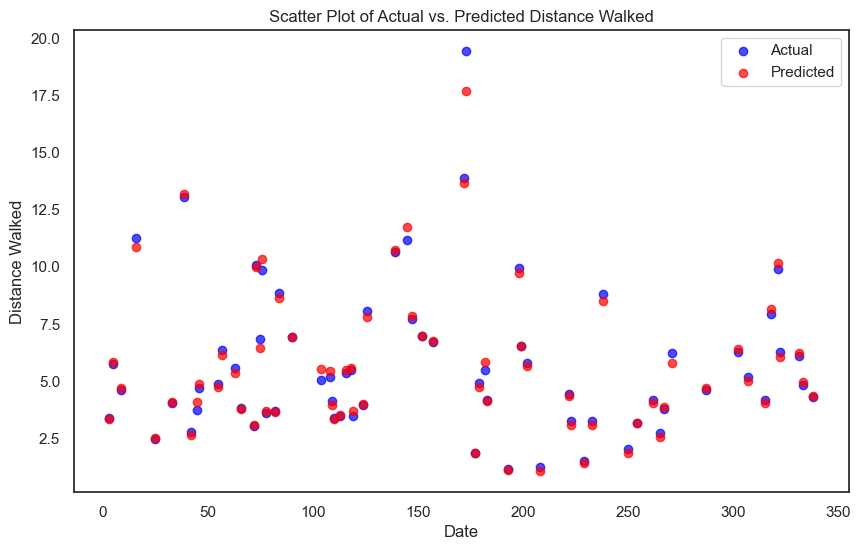

In [26]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual step count values for the test set
# and y_pred contains the predicted values

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test.index, y_test, label='Actual', color='blue', marker='o', alpha=0.7)

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, label='Predicted', color='red', marker='o', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Actual vs. Predicted Distance Walked')
plt.xlabel('Date')
plt.ylabel('Distance Walked')
plt.legend()



# Show the plot
plt.show()
